In [22]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

from shutil import copyfile
from shutil import copytree

import shutil
import os

In [ ]:
os.makedirs('./data/gym_data/training')
os.makedirs('./data/gym_data/validation')

In [23]:
training_dir = './drive/MyDrive/gym_data2/training'
validation_dir = './drive/MyDrive/gym_data2/validation'

training_path = './data/gym_data/training'
validation_path = './data/gym_data/validation'

if os.path.exists(training_path):
  shutil.rmtree(training_path)
  copytree(training_dir, training_path)

if os.path.exists(validation_path):
  shutil.rmtree(validation_path)
  copytree(validation_dir, validation_path)


In [24]:
training_path = './data/gym_data/training'
validation_path = './data/gym_data/validation'

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory(
    directory=training_path,
    target_size=(224,224),
    batch_size=10)

validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=validation_path, target_size=(224,224), batch_size=10)

Found 3563 images belonging to 11 classes.
Found 1529 images belonging to 11 classes.


In [25]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [26]:
x = mobile.layers[-5].output

In [27]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=11, activation='softmax')(x)

In [28]:
model = Model(inputs=mobile.input, outputs=output)

In [29]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=validation_batches,
            validation_steps=len(validation_batches),
            epochs=10,
            verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


357/357 - 144s - loss: 1.0077 - accuracy: 0.6831 - val_loss: 0.5560 - val_accuracy: 0.8326 - 144s/epoch - 404ms/step
Epoch 2/10
357/357 - 106s - loss: 0.5200 - accuracy: 0.8353 - val_loss: 0.3498 - val_accuracy: 0.8823 - 106s/epoch - 296ms/step
Epoch 3/10
357/357 - 108s - loss: 0.3965 - accuracy: 0.8745 - val_loss: 0.2810 - val_accuracy: 0.9058 - 108s/epoch - 302ms/step
Epoch 4/10
357/357 - 107s - loss: 0.3339 - accuracy: 0.8939 - val_loss: 0.2836 - val_accuracy: 0.9078 - 107s/epoch - 299ms/step
Epoch 5/10
357/357 - 108s - loss: 0.2839 - accuracy: 0.9049 - val_loss: 0.3550 - val_accuracy: 0.8842 - 108s/epoch - 303ms/step
Epoch 6/10
357/357 - 106s - loss: 0.2451 - accuracy: 0.9234 - val_loss: 0.2962 - val_accuracy: 0.9111 - 106s/epoch - 298ms/step
Epoch 7/10
357/357 - 109s - loss: 0.2086 - accuracy: 0.9332 - val_loss: 0.2614 - val_accuracy: 0.9235 - 109s/epoch - 305ms/step
Epoch 8/10
357/357 - 106s - loss: 0.2041 - accuracy: 0.9352 - val_loss: 0.2695 - val_accuracy: 0.9215 - 106s/epoch 

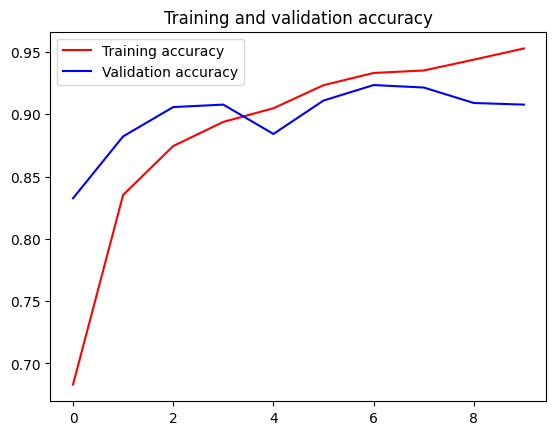

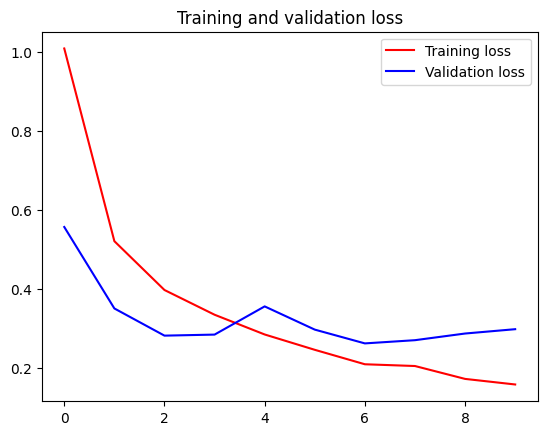

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [34]:
export_dir = 'saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

In [35]:
import pathlib

optimization = tf.lite.Optimize.DEFAULT
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model2.tflite')
tflite_model_file.write_bytes(tflite_model)

3392872

In [36]:
class_names = ['aerobic_steppers', 'barbell', 'bench_press', 'cable_machine', 'dumb_bell', 'elliptical', 'leg_press_machine',
               'rowing_machine', 'smith_machine', 'stationary_bike', 'treadmill']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))